<a href="https://colab.research.google.com/github/prabindh/covid2020-predictor/blob/master/Prediction_Covid_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Exercise

Predict the number of cases n-days after from the 1st reported infection.

Use the data available in the below file, provided by JHU CSSE.

https://github.com/prabindh/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [1]:
#import cudf as pd
import pandas as pd

from urllib.request import urlopen
#numbers_csv = urlopen("https://raw.githubusercontent.com/prabindh/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_csv = urlopen("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_df = pd.read_csv(numbers_csv)
numbers_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525


Lets find the details of this dataset.


In [2]:
numbers_df["Country/Region"].describe()

count       266
unique      188
top       China
freq         33
Name: Country/Region, dtype: object

Treating the various provinces, countries as independent features, get only the numeric count for all rows.

In [3]:
count_df = numbers_df.iloc[:, 4:]
count_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525


In [4]:
count_df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,30.954887,37.319549,45.255639,63.109023,74.763158,89.842105,103.921053,115.796992,129.304511,139.582707,150.973684,160.781955,168.458647,170.030075,226.996241,251.533835,259.586466,267.796992,275.447368,282.522556,284.402256,286.507519,288.872180,295.492481,296.913534,299.033835,302.240602,305.913534,311.041353,316.218045,323.342105,332.278195,...,2.489881e+04,2.539746e+04,2.587041e+04,2.629312e+04,2.668199e+04,2.714433e+04,2.764726e+04,2.816677e+04,2.865168e+04,2.915581e+04,2.965630e+04,3.011414e+04,3.063887e+04,3.130012e+04,3.182220e+04,3.250241e+04,3.309738e+04,3.358950e+04,3.410777e+04,3.472937e+04,3.535958e+04,3.602860e+04,3.674665e+04,3.741512e+04,3.803624e+04,3.862222e+04,3.927774e+04,4.009086e+04,4.087190e+04,4.163942e+04,4.236509e+04,4.305337e+04,4.368457e+04,4.447219e+04,4.526872e+04,4.612225e+04,4.698672e+04,4.781168e+04,4.853518e+04,4.926049e+04
std,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,303.897894,360.297287,443.366813,689.035590,832.953418,1026.582242,1209.754647,1359.927896,1534.122760,1665.831961,1820.905815,1949.402861,2049.809414,2050.149390,2958.034534,3337.708666,3450.661369,3569.103387,3679.809248,3783.531445,3804.941211,3830.105321,3843.654801,3930.735156,3930.773626,3943.283200,3973.897323,3998.655045,4024.278703,4044.750259,4072.597785,4109.801984,...,1.290453e+05,1.312076e+05,1.331867e+05,1.347637e+05,1.362414e+05,1.380949e+05,1.401382e+05,1.422780e+05,1.444351e+05,1.465589e+05,1.483254e+05,1.500917e+05,1.524038e+05,1.549108e+05,1.572063e+05,1.604555e+05,1.633133e+05,1.653986e+05,1.678590e+05,1.709742e+05,1.741756e+05,1.775719e+05,1.814514e+05,1.850113e+05,1.881686e+05,1.912648e+05,1.948511e+05,1.990591e+05,2.035107e+05,2.077693e+05,2.115818e+05,2.152661e+05,2.185190e+05,2.232169e+05,2.278585e+05,2.327247e+05,2.378347e+05,2.425360e+05,2.467222e+05,2.507489e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00

Get the country with maximum numbers the last day of record.


In [5]:
max_count = count_df.iloc[:, -1].max()
max_count

3363056

In [6]:
max_index = count_df['4/2/20'].idxmax()
max_index

225

In [7]:
numbers_df.iloc[max_index]

Province/State        NaN
Country/Region         US
Lat               37.0902
Long             -95.7129
1/22/20                 1
                   ...   
7/9/20            3117946
7/10/20           3184573
7/11/20           3245925
7/12/20           3304942
7/13/20           3363056
Name: 225, Length: 178, dtype: object

In [8]:
usa_data = numbers_df[numbers_df["Country/Region"] == "US"]
usa_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,...,1878680,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3363056


In [9]:
china_data = numbers_df[numbers_df["Country/Region"] == "China"]
china_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,594,594,594,594,594,594,594,595,601,637,673,700,731,752,777,777,821,830,843,850,863,874,891,905,912,919,922,923,925,926,928,929,929,929,929,929,929,929,929,929
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,579,579,579,579,579,579,579,579,579,580,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582,582
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,358,358,359,359,359,359,360,361,361,361,362,362,362,362,362,362,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,139,139,139,139,139,139,139,139,139,139,139,139,149,150,151,151,151,151,158,158,161,161,162,163,163,164,164,164,164,164,167,167,167,167,167,167,167,167,167,167
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,1598,1601,1602,1602,1604,1604,1607,1607,1608,1625,1625,1628,1628,1628,1631,1631,1634,1634,1634,1634,1635,1635,1637,1637,1637,1641,1641,1642,1642,1643,1643,1643,1643,1645,1647,1647,1647,1648,1650,1650
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,169,169,170,170,170,170,170,170,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,328,328,328,328,328,328,328,328,328,328,331,335,336,338,340,340,344,346,346,348,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349


How does India fare ?

In [10]:
india_data = numbers_df[numbers_df["Country/Region"] == "India"]
india_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,226713,236184,246622,257486,265928,276146,286605,297535,308993,320922,332424,343091,354065,366946,380532,395048,410451,425282,440215,456183,473105,490401,508953,528859,548318,566840,585481,604641,625544,648315,673165,697413,719664,742417,767296,793802,820916,849522,878254,906752


## Visualisation of the rates

In [11]:
# Take only the numerical values
counts = india_data.iloc[0:1, range(4, len(india_data.columns))]

startCol = 0
for columnName in counts:
  if counts[columnName].values > 0:
    break
  startCol = startCol + 1
counts = counts.iloc[0:1, range(startCol, len(counts.columns))]

counts

,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
131,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,5,28,30,31,34,39,43,...,226713,236184,246622,257486,265928,276146,286605,297535,308993,320922,332424,343091,354065,366946,380532,395048,410451,425282,440215,456183,473105,490401,508953,528859,548318,566840,585481,604641,625544,648315,673165,697413,719664,742417,767296,793802,820916,849522,878254,906752


## Converting to np array

In [12]:
counts_np = counts.to_numpy()

In [13]:
counts_np.shape

(1, 166)

In [14]:
import numpy as np
counts_np = np.squeeze(counts_np)

In [15]:
import numpy as np
counts_np

array([     1,      1,      1,      2,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            5,      5,     28,     30,     31,     34,     39,     43,
           56,     62,     73,     82,    102,    113,    119,    142,
          156,    194,    244,    330,    396,    499,    536,    657,
          727,    887,    987,   1024,   1251,   1397,   1998,   2543,
         2567,   3082,   3588,   4778,   5311,   5916,   6725,   7598,
         8446,   9205,  10453,  11487,  12322,  13430,  14352,  15722,
        17615,  18539,  20080,  21370,  23077,  24530,  26283,  27890,
        29451,  31324,  33062,  34863,  37257,  39699,  42505,  46437,
        49400,  52987,  56351,  59695,  62808,  67161,  70768,  74292,
        78055,  81997,  85784,  90648,  95698, 100328, 106475, 112028,
      

## Visualisation of the data

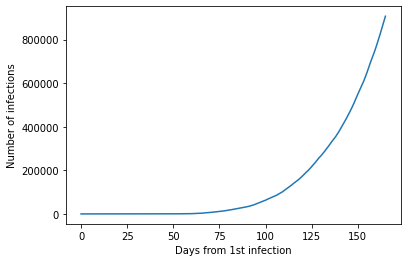

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,counts_np.shape[0])),counts_np)
plt.xlabel("Days from 1st infection") 
plt.ylabel("Number of infections") 
plt.show()


## Formulate the data-set


In [17]:
x_days = np.array(list(range(0, len(counts_np))))
x_days

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165])

In [18]:
y_infections_india = counts_np
y_infections_india

array([     1,      1,      1,      2,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            5,      5,     28,     30,     31,     34,     39,     43,
           56,     62,     73,     82,    102,    113,    119,    142,
          156,    194,    244,    330,    396,    499,    536,    657,
          727,    887,    987,   1024,   1251,   1397,   1998,   2543,
         2567,   3082,   3588,   4778,   5311,   5916,   6725,   7598,
         8446,   9205,  10453,  11487,  12322,  13430,  14352,  15722,
        17615,  18539,  20080,  21370,  23077,  24530,  26283,  27890,
        29451,  31324,  33062,  34863,  37257,  39699,  42505,  46437,
        49400,  52987,  56351,  59695,  62808,  67161,  70768,  74292,
        78055,  81997,  85784,  90648,  95698, 100328, 106475, 112028,
      

## Obtaining data for any country

Note the changes, to add up all provinces/regions within a country, if found. For example, there are more than one regions in China.

In [19]:
def get_covidian_count(country_name):
  country_data = numbers_df[numbers_df["Country/Region"] == country_name]
  rows = country_data.shape[0]
  counts = country_data.iloc[0:rows, range(4, len(country_data.columns))]
  counts = counts.sum()
  startCol = 0
  for column in counts:
    if column > 0:
      break
    startCol = startCol + 1
  counts = counts.iloc[range(startCol, len(counts))]
  np_arr = np.squeeze(counts.to_numpy())
  x_days = np.array(list(range(0, len(np_arr))))
  return np.array([x_days, np_arr])



In [20]:
infections_usa = get_covidian_count("US")
infections_india = get_covidian_count("India")
infections_china = get_covidian_count("China")
infections_india

array([[     0,      1,      2,      3,      4,      5,      6,      7,
             8,      9,     10,     11,     12,     13,     14,     15,
            16,     17,     18,     19,     20,     21,     22,     23,
            24,     25,     26,     27,     28,     29,     30,     31,
            32,     33,     34,     35,     36,     37,     38,     39,
            40,     41,     42,     43,     44,     45,     46,     47,
            48,     49,     50,     51,     52,     53,     54,     55,
            56,     57,     58,     59,     60,     61,     62,     63,
            64,     65,     66,     67,     68,     69,     70,     71,
            72,     73,     74,     75,     76,     77,     78,     79,
            80,     81,     82,     83,     84,     85,     86,     87,
            88,     89,     90,     91,     92,     93,     94,     95,
            96,     97,     98,     99,    100,    101,    102,    103,
           104,    105,    106,    107,    108,    109,    110, 

In [21]:
np.savetxt("usa.csv",  np.transpose([infections_usa[0],infections_usa[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("india.csv",  np.transpose([infections_india[0],infections_india[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("china.csv",  np.transpose([infections_china[0],infections_china[1]]), fmt="%d,%d", header="Days, Count")

To confirm the data is proper, load the data back and check.

In [22]:
test_np = np.loadtxt("usa.csv", delimiter=',', skiprows=1, dtype='int,int')
test_np

array([(  0,       1), (  1,       1), (  2,       2), (  3,       2),
       (  4,       5), (  5,       5), (  6,       5), (  7,       5),
       (  8,       5), (  9,       7), ( 10,       8), ( 11,       8),
       ( 12,      11), ( 13,      11), ( 14,      11), ( 15,      11),
       ( 16,      11), ( 17,      11), ( 18,      11), ( 19,      11),
       ( 20,      12), ( 21,      12), ( 22,      13), ( 23,      13),
       ( 24,      13), ( 25,      13), ( 26,      13), ( 27,      13),
       ( 28,      13), ( 29,      13), ( 30,      15), ( 31,      15),
       ( 32,      15), ( 33,      15), ( 34,      15), ( 35,      15),
       ( 36,      16), ( 37,      16), ( 38,      24), ( 39,      30),
       ( 40,      53), ( 41,      73), ( 42,     104), ( 43,     174),
       ( 44,     222), ( 45,     337), ( 46,     451), ( 47,     519),
       ( 48,     711), ( 49,    1109), ( 50,    1561), ( 51,    2157),
       ( 52,    2870), ( 53,    2968), ( 54,    4360), ( 55,    6141),
      

## Given x, predict y

#### Kaggle
Note - this notebook is also available as a Kaggle kernel, at
https://www.kaggle.com/prabindh/kernel5f31471257

#### References
1. https://pypi.org/project/fbprophet

2. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
